# Capstone Project Week 3

## Table of contents
* Introduction/Business Problem
* Data
* Methodology
* Results and Discussion
* Conclusion

# 1. Introduction / Business Problem

#### On September 11, 2001, the twin towers of the World Trade Center were destroyed and history recorded that over 3,000 people were killed. Not many people know that about the same number of people die every day on roads world wide1. This figure does not include at least the 30,000 others injured or disabled. 

This accumulates to over 1 million people killed and between 20–50 million injured or crippled in road accidents each year2. It is obvious that road traffic injuries are a major public health problem globally. In fact, as projected by the WHO that road traffic disability-adjusted life years (DALYs) loss will move from being the ninth leading cause of DALYs in 1999 to the third leading cause by year 2020.

Traffic accidents incur immense losses to individuals, families and the country by being the cause of so many untimely deaths, debilitating injuries, damage to properties and loss in productivity. In addition to economic losses traffic accidents have a social component in that victims and/or their families are often beset with grief, hardship and even a degraded quality of life. 

Key facts from World Health Organization
1. Approximately 1.35 million people die each year as a result of road traffic crashes.
2. Road traffic crashes cost most countries 3% of their gross domestic product.
3. More than half of all road traffic deaths are among vulnerable road users: pedestrians, cyclists, and motorcyclists.


The project objective is to study and understand the important variable accidents occur which would help us (Government / People) to reduce the number of deaths and injuries from road traffic crashes in the future.

## 2. Data


The data used is Seattle city data provided by SPD and recorded by Traffic Records. The data is from 2004 to 2020 and contains various features such as location, the severity of the collision, number of vehicles/cyclists/pedestrians involved, date/time of incident, weather, road conditions and more. 


Since we are trying to see how environmental factors affect the severity of car accidents, we will primarily look at variables related to weather, road conditions, and location. These variables are ADDRTYPE, WEATHER, ROADCOND, LIGHTCOND. We will use these variables to develop a model that determines the severity of the accident (SEVERITYCODE).

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import scipy.optimize as opt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [2]:
url ='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(url)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
def bar_plot(data_column, x_label, y_label, title, size=(10,6), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot(x = codes, y=count)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=16)
    plt.xticks(rotation=rotate)
    plt.show()

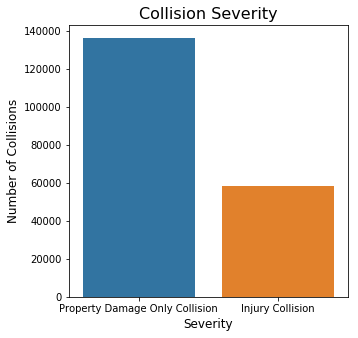

In [5]:
bar_plot(df['SEVERITYDESC'], 'Severity', 'Number of Collisions', 'Collision Severity', size=(5,5))

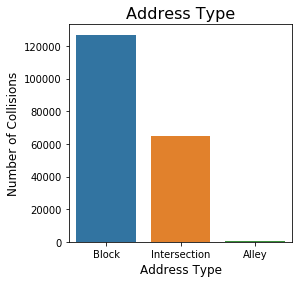

In [6]:
bar_plot(df['ADDRTYPE'], 'Address Type', 'Number of Collisions', 'Address Type', size=(4,4))

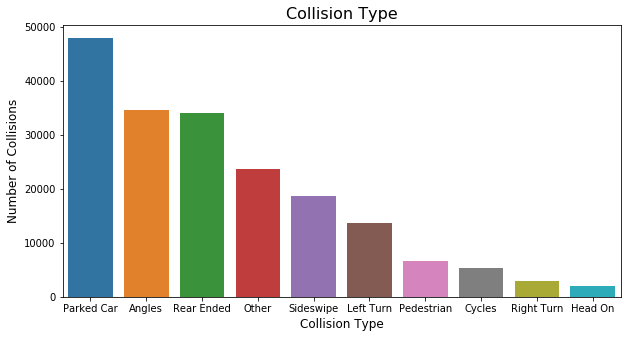

In [7]:
bar_plot(df['COLLISIONTYPE'], 'Collision Type', 'Number of Collisions', 'Collision Type', size=(10,5))

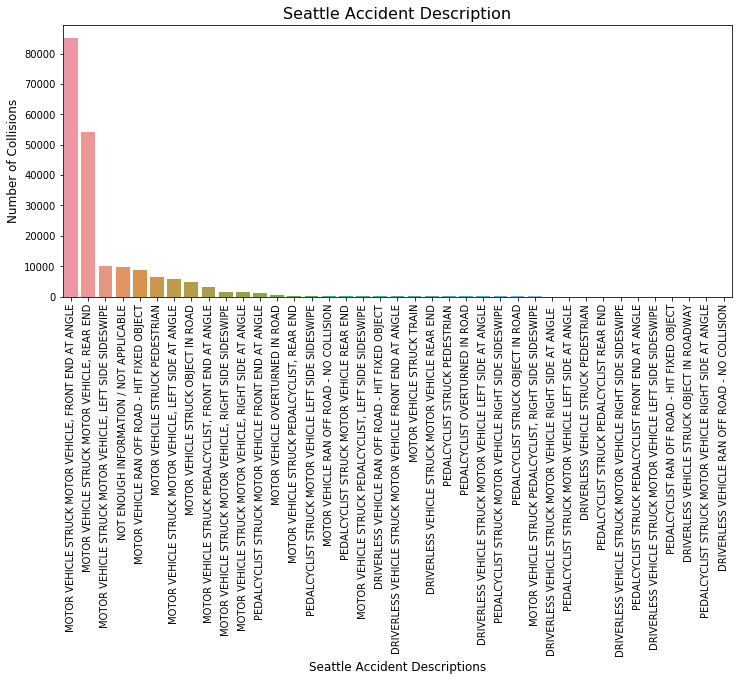

In [8]:
bar_plot(df['SDOT_COLDESC'], 'Seattle Accident Descriptions', 'Number of Collisions', 'Seattle Accident Description', rotate=90,size=(12,5))

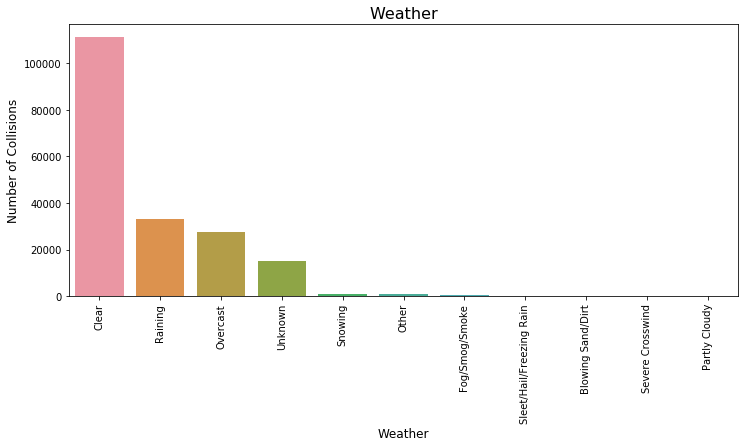

In [9]:
bar_plot(df['WEATHER'], 'Weather', 'Number of Collisions', 'Weather', rotate=90, size=(12,5))

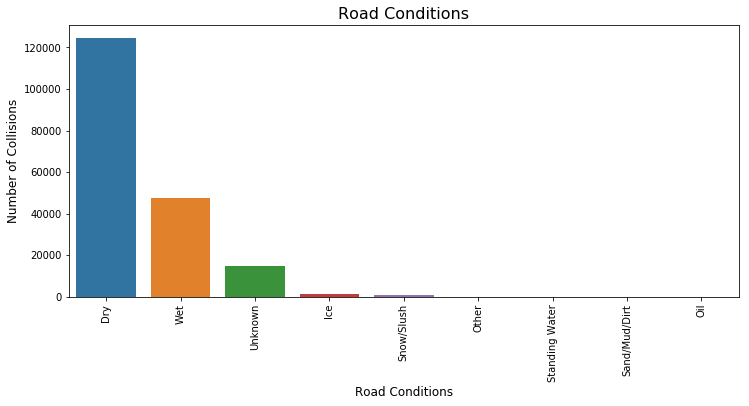

In [10]:
bar_plot(df['ROADCOND'], 'Road Conditions', 'Number of Collisions', 'Road Conditions', rotate=90,size=(12,5))

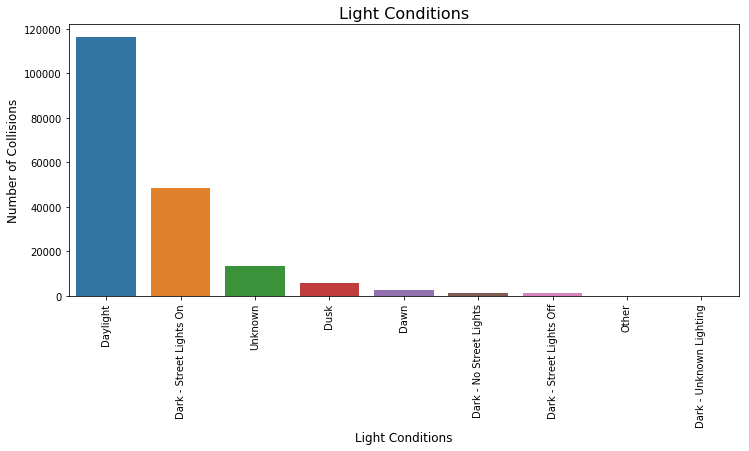

In [11]:
bar_plot(df['LIGHTCOND'], 'Light Conditions', 'Number of Collisions', 'Light Conditions', rotate=90, size=(12,5))

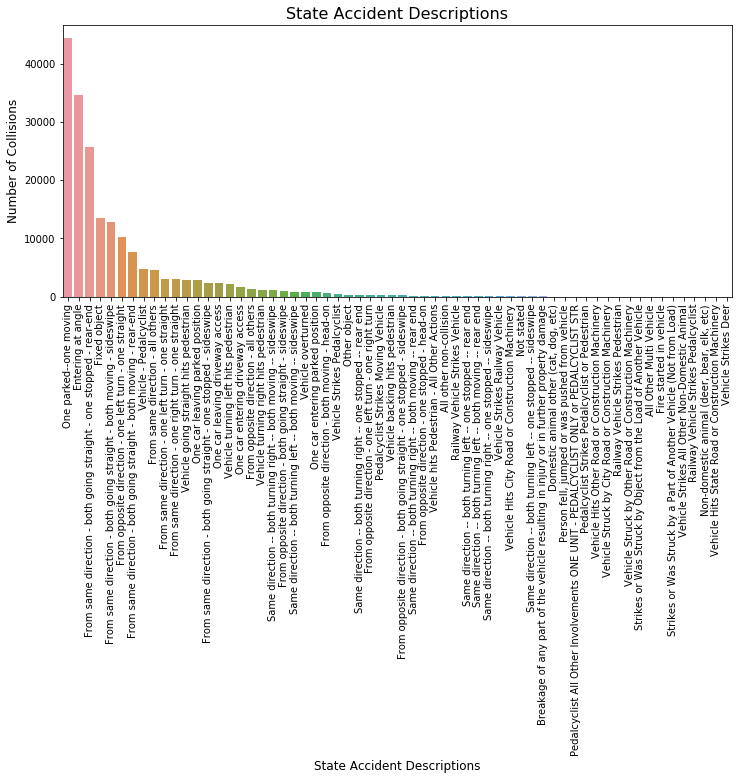

In [12]:
bar_plot(df['ST_COLDESC'], 'State Accident Descriptions', 'Number of Collisions', 'State Accident Descriptions',  rotate=90, size=(12,5))

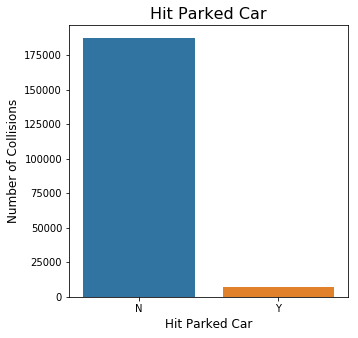

In [13]:
bar_plot(df['HITPARKEDCAR'], 'Hit Parked Car', 'Number of Collisions', 'Hit Parked Car', size=(5,5))

What we know from Data Understanding:
    
1. Collisions tranding down.
2. Collisions tend to happen in and around the downtown area and major highways.
3. Most collision are with parked cars. Angles and rear end.

## 3. Methodology

####    Data preparation
	Created subset of necessary data.
	Insert value to missing data.
	Clear or change data if necessary.
	
####    Modeling 
	Create Logistic Regression model
	Create K-Nerrest model 
	Create Decision Tree model
	Create Random Forest Classifier model 
	Created Support Vector Machine Classifier medel


In [14]:
# subset of the data 

  crash_df = df[['SEVERITYCODE', 'SEVERITYDESC', 'ADDRTYPE', 'COLLISIONTYPE','PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND',]].copy()      

In [15]:
#missing values 

crash_df.isnull().sum()

SEVERITYCODE        0
SEVERITYDESC        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PEDCYLCOUNT         0
VEHCOUNT            0
INCDTTM             0
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64

In [16]:
# input missing data

crash_df.dropna(subset=['ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE', 'LIGHTCOND','WEATHER','ROADCOND'], inplace=True)
crash_df.isnull().sum()

SEVERITYCODE     0
SEVERITYDESC     0
ADDRTYPE         0
COLLISIONTYPE    0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDTTM          0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64

In [17]:
# check if need to change type

crash_df.dtypes

SEVERITYCODE      int64
SEVERITYDESC     object
ADDRTYPE         object
COLLISIONTYPE    object
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDTTM          object
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [18]:
crash_df.COLLISIONTYPE.value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [19]:
# drop incidents with 'other' collision type

crash_df.COLLISIONTYPE.replace(to_replace=['Other'], value=np.NaN, inplace=True)
crash_df.dropna(subset=['COLLISIONTYPE'], inplace=True)

In [20]:
crash_df.WEATHER.value_counts()

Clear                       96124
Raining                     27473
Overcast                    23397
Unknown                     10980
Snowing                       694
Other                         684
Fog/Smog/Smoke                433
Sleet/Hail/Freezing Rain       84
Blowing Sand/Dirt              46
Severe Crosswind               16
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [21]:
# recategorize 'weather' data and drop 'unknown', 'other' incidents

crash_df.WEATHER.replace(to_replace=['Raining', 'Sleet/Hail/Freezing Rain'], value='Wet weather', inplace=True)
crash_df.WEATHER.replace(to_replace=['Overcast', 'Fog/Smog/Smoke', 'Partly Cloudy'], value='Bad visibility', inplace=True)
crash_df.WEATHER.replace(to_replace=['Blowing Sand/Dirt', 'Severe Crosswind'], value='Windy', inplace=True)
crash_df.WEATHER.replace(to_replace=['Unknown', 'Other'], value=np.NaN, inplace=True)
crash_df.dropna(subset=['WEATHER'], inplace=True)

In [22]:
crash_df.ROADCOND.value_counts()

Dry               106988
Wet                39005
Ice                  716
Unknown              702
Snow/Slush           693
Other                 62
Standing Water        51
Sand/Mud/Dirt         31
Oil                   23
Name: ROADCOND, dtype: int64

In [23]:
# recategorize 'road condition' data and drop 'unknown', 'other' incidents

crash_df.ROADCOND.replace(to_replace='Wet', value='Wet road', inplace=True)
crash_df.ROADCOND.replace(to_replace='Standing Water', value='Wet road', inplace=True)
crash_df.ROADCOND.replace(to_replace=['Snow/Slush', 'Ice'], value='Snow/Ice', inplace=True)
crash_df.ROADCOND.replace(to_replace=['Unknown', 'Other'], value=np.NaN, inplace=True)
crash_df.ROADCOND.replace(to_replace=['Sand/Mud/Dirt', 'Oil'], value='Sand/Mud/Dirt/Oil', inplace=True)
crash_df.dropna(subset=['ROADCOND'], inplace=True)

In [24]:
# recategorize 'light condition' data and drop 'unknown', 'other' incidents

crash_df.LIGHTCOND.replace(to_replace=['Dark - Street Lights On', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting'], value='Dark', inplace=True)
crash_df.LIGHTCOND.replace(to_replace='Dawn', value='Daylight', inplace=True)
crash_df.LIGHTCOND.replace(to_replace=['Other', 'Unknown'], value=np.NaN, inplace=True)
crash_df.dropna(subset=['LIGHTCOND'], inplace=True)

In [25]:
crash_df.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              63102
At Intersection (intersection related)               56031
Mid-Block (but intersection related)                 18194
Driveway Junction                                     6362
At Intersection (but not related to intersection)     1556
Ramp Junction                                          124
Unknown                                                  3
Name: JUNCTIONTYPE, dtype: int64

In [26]:
# drop incidents with 'unknown' junction type

crash_df.JUNCTIONTYPE.replace(to_replace='Unknown', value=np.NaN, inplace=True)
crash_df.dropna(subset=['JUNCTIONTYPE'], inplace=True)

In [27]:
# encode categorical features with '0' or '1'

dummy = pd.get_dummies(crash_df['ADDRTYPE'])
crash_df = pd.concat([crash_df, dummy], axis=1)
crash_df.drop(labels='ADDRTYPE', axis=1, inplace=True)

In [28]:
dummy = pd.get_dummies(crash_df['COLLISIONTYPE'])
crash_df = pd.concat([crash_df, dummy], axis=1)
crash_df.drop(labels='COLLISIONTYPE', axis=1, inplace=True)

In [29]:
dummy = pd.get_dummies(crash_df['JUNCTIONTYPE'])
crash_df = pd.concat([crash_df, dummy], axis=1)
crash_df.drop(labels='JUNCTIONTYPE', axis=1, inplace=True)

In [30]:
dummy = pd.get_dummies(crash_df['WEATHER'])
crash_df = pd.concat([crash_df, dummy], axis=1)
crash_df.drop(labels='WEATHER', axis=1, inplace=True)

In [31]:
dummy = pd.get_dummies(crash_df['ROADCOND'])
crash_df = pd.concat([crash_df, dummy], axis=1)
crash_df.drop(labels='ROADCOND', axis=1, inplace=True)

In [32]:
dummy = pd.get_dummies(crash_df['LIGHTCOND'])
crash_df = pd.concat([crash_df, dummy], axis=1)
crash_df.drop(labels='LIGHTCOND', axis=1, inplace=True)

In [33]:
# make copy of prepared data for final model and analysis

original_crash_df = crash_df.copy()

In [34]:
# undersample majority class (class 1) to balance data

codeone_df = crash_df[crash_df['SEVERITYCODE'] == 1]
codetwo_df = crash_df[crash_df['SEVERITYCODE'] == 2]
sampleone_df = resample(codeone_df, replace=False, n_samples=codetwo_df.shape[0], random_state=42)
crash_df = pd.concat([sampleone_df, codetwo_df])
crash_df['SEVERITYCODE'].value_counts()

2    49448
1    49448
Name: SEVERITYCODE, dtype: int64

In [35]:
# set Features
Features = ['Block', 'Intersection', 'Angles', 'Cycles', 'Head On', 'Left Turn',
       'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe',
       'Driveway Junction','Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Bad visibility', 'Clear', 'Snowing', 'Wet weather', 'Windy', 'Dry',
       'Sand/Mud/Dirt/Oil', 'Snow/Ice', 'Wet road', 'Dark', 'Daylight',
       'Dusk']
X = crash_df[Features].copy()
y = crash_df['SEVERITYCODE'].copy()

In [36]:
# split data into training set and testing set (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (79116, 27) (79116,)
Test set: (19780, 27) (19780,)


In [37]:
# standardize the data

ss = preprocessing.StandardScaler().fit(X_train.astype(np.float))
X_train = ss.transform(X_train.astype(np.float))
X_test = ss.transform(X_test.astype(np.float))

In [38]:
# Confusion Matrix plotting function

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 3.1 Logistic Regression 

In [39]:
# find best hyperparameters for logistic regression classifier

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
results_df = pd.DataFrame(index=cs)
results_df.index.name='C'
for s in solvers:
    results = []
    for c in cs:
        LR = LogisticRegression(C=c, solver=s, max_iter=4000, random_state=42).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        j_score = jaccard_similarity_score(y_test, yhat)
        results.append(j_score)
    results_df[s] = results
results_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


,newton-cg,lbfgs,liblinear,sag,saga
C,,,,,
0.0001,0.692619,0.692619,0.692619,0.692619,0.692619
0.0010,0.690040,0.690040,0.690040,0.690040,0.690040
0.0100,0.689687,0.689687,0.689687,0.689687,0.689687
0.1000,0.689737,0.689737,0.689737,0.689737,0.689737
1.0000,0.689737,0.689737,0.689737,0.689737,0.689737
10.0000,0.689737,0.689737,0.689737,0.689737,0.689737
100.0000,0.689737,0.689737,0.689737,0.689737,0.689737


Confusion matrix, without normalization


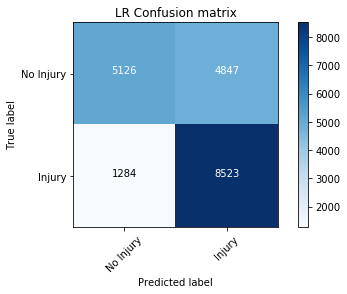

In [40]:
# run logistic regression classifier and show results

LR = LogisticRegression(C=0.001, solver='liblinear', random_state=42).fit(X_train,y_train)
yhat = LR.predict(X_test)
LR_j_score = jaccard_similarity_score(y_test, yhat)
LR_f_score = f1_score(y_test, yhat, average='weighted')
LR_class_report = classification_report(y_test, yhat)
LR_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='LR Confusion matrix')

In [41]:
print('Logistic Regression jaccard score:', round(LR_j_score, 4))
print('Logistic Regression F1 score:', round(LR_f_score, 4))
print('Logistic Regression classification report:\n\n', LR_class_report)

Logistic Regression jaccard score: 0.69
Logistic Regression F1 score: 0.6802
Logistic Regression classification report:

               precision    recall  f1-score   support

           1       0.80      0.51      0.63      9973
           2       0.64      0.87      0.74      9807

   micro avg       0.69      0.69      0.69     19780
   macro avg       0.72      0.69      0.68     19780
weighted avg       0.72      0.69      0.68     19780



## 3.2 Decision Tree 

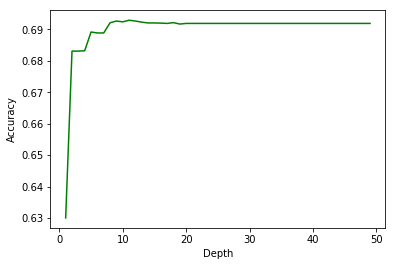

The best accuracy is 0.6929 with depth= 11


In [42]:
# find best hyperparameters for decision tree classifier

depth = 50
mean_acc = np.zeros((depth-1))
for n in range(1,depth): 
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n, random_state=42).fit(X_train,y_train)
    yhat=DT.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
plt.plot(range(1,depth),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()
print("The best accuracy is", round(mean_acc.max(), 4), "with depth=", mean_acc.argmax()+1)

Confusion matrix, without normalization


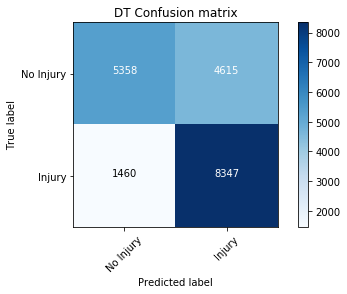

In [43]:
# run decision tree classifier and show results

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 11, random_state=42).fit(X_train, y_train)
yhat = DT.predict(X_test)
DT_j_score = jaccard_similarity_score(y_test, yhat)
DT_f_score = f1_score(y_test, yhat, average='weighted')
DT_class_report = classification_report(y_test, yhat)
DT_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='DT Confusion matrix')

In [44]:
print('Decision Tree jaccard score:', round(DT_j_score, 4))
print('Decision Tree F1 score:', round(DT_f_score, 4))
print('Decision Tree classification report:\n\n', DT_class_report)

Decision Tree jaccard score: 0.6929
Decision Tree F1 score: 0.6853
Decision Tree classification report:

               precision    recall  f1-score   support

           1       0.79      0.54      0.64      9973
           2       0.64      0.85      0.73      9807

   micro avg       0.69      0.69      0.69     19780
   macro avg       0.71      0.69      0.69     19780
weighted avg       0.72      0.69      0.69     19780



## 3.3 K-Nearest Neighbors (KNN) 

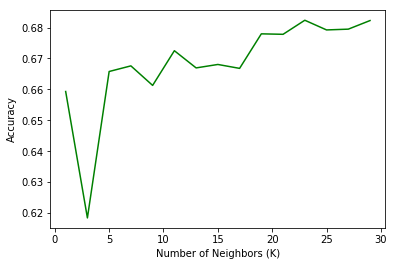

The best accuracy was with 0.6824 with k= 23


In [45]:
# find best hyperparameters for k-nearest neighbors classifier, odd k only

Ks = 30
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks,2):
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat= KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
plt.plot(range(1,Ks,2),mean_acc[::2],'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()
print("The best accuracy was with", round(mean_acc.max(), 4), "with k=", mean_acc.argmax()+1)

Confusion matrix, without normalization


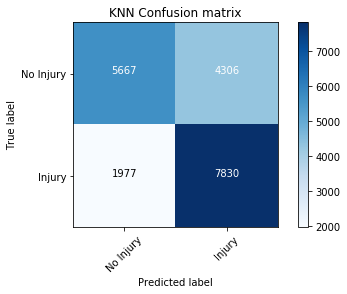

In [46]:
# run k-nearest neighbors classifier and show results

KNN = KNeighborsClassifier(n_neighbors = 23).fit(X_train,y_train)
yhat = KNN.predict(X_test)
KNN_j_score = jaccard_similarity_score(y_test, yhat)
KNN_f_score = f1_score(y_test, yhat, average='weighted')
KNN_class_report = classification_report(y_test, yhat)
KNN_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='KNN Confusion matrix')

In [47]:
print('KNN jaccard score:', round(KNN_j_score, 4))
print('KNN F1 score:', round(KNN_f_score, 4))
print('KNN classification report:\n\n', KNN_class_report)

KNN jaccard score: 0.6824
KNN F1 score: 0.6782
KNN classification report:

               precision    recall  f1-score   support

           1       0.74      0.57      0.64      9973
           2       0.65      0.80      0.71      9807

   micro avg       0.68      0.68      0.68     19780
   macro avg       0.69      0.68      0.68     19780
weighted avg       0.69      0.68      0.68     19780



## 3.4 Support Vector Machine (SVM)

Confusion matrix, without normalization


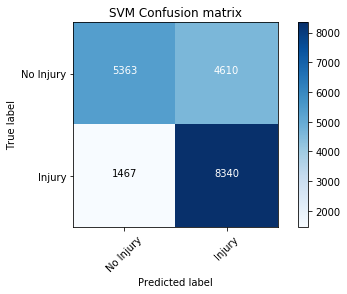

In [48]:
# run SVM classifier and show results
# SVM does not do well with large datasets so I only used the 'rbf' kernel

SVM = svm.SVC(kernel='rbf', gamma='auto', random_state=42).fit(X_train, y_train)
yhat = SVM.predict(X_test)
SVM_j_score = jaccard_similarity_score(y_test, yhat)
SVM_f_score = f1_score(y_test, yhat, average='weighted')
SVM_class_report = classification_report(y_test, yhat)
SVM_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='SVM Confusion matrix')

In [49]:
print('SVM jaccard score:', round(SVM_j_score, 4))
print('SVM F1 score:', round(SVM_f_score, 4))
print('SVM classification report:\n\n', SVM_class_report)

SVM jaccard score: 0.6928
SVM F1 score: 0.6853
SVM classification report:

               precision    recall  f1-score   support

           1       0.79      0.54      0.64      9973
           2       0.64      0.85      0.73      9807

   micro avg       0.69      0.69      0.69     19780
   macro avg       0.71      0.69      0.69     19780
weighted avg       0.72      0.69      0.69     19780



## 4. Results

Comparison and Discuss

| Algorithm          | Jaccard | F1-score | 
|--------------------|---------|----------|
| KNN                | 0.6882       | 0.6876        | 
| Decision Tree      | 0.6929       | 0.6853        | 
| SVM                | 0.6927       | 0.6849        | 
| LogisticRegression | 0.6900       | 0.6802        | 

After run Logistic Regression, Dicision Tree, K-Nearest neighbors and Support Vector Machine models, we found that immaterial of average Jaccard and F1 Score between each model. Each score over 0.68.   

In [50]:
# get features and target

X = original_crash_df[Features].copy()
y = original_crash_df['SEVERITYCODE'].copy()
print('Full data set:', X.shape, y.shape)

Full data set: (145369, 27) (145369,)


In [51]:
# standardize data and final models

X = preprocessing.StandardScaler().fit_transform(X.astype(np.float))
Final_Model = KNeighborsClassifier(n_neighbors = 23).fit(X,y)
DT_Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth = 13).fit(X,y)

In [52]:
Final_Model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [53]:
DT_Final_Model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
# extract importances and create DataFrame for graph

importances = DT_Final_Model.feature_importances_
feature_importances = []
for feature, score in zip(Features, importances):
    feature_importances.append([feature, round(score, 2)])
feature_importances_df = pd.DataFrame(sorted(feature_importances, key=lambda x:x[1], reverse=True),
                                columns=['Feature','Importance Score'])
feature_importances_df

,Feature,Importance Score
0,Parked Car,0.43
1,Sideswipe,0.21
2,Pedestrian,0.16
3,Cycles,0.14
4,Intersection,0.01
5,Right Turn,0.01
6,Block,0.00
7,Angles,0.00
8,Head On,0.00
9,Left Turn,0.00


## 5. Discussion
Important features of collisions is Park Car. However Jaccard and F1-Score are not over 0.7. In my opinoin, the study features in this model don't cover every factor of collisions. We Know that the collisions factor are not only the environment. Car Performance, Driver ability and habit also the maim factor of collisions.    

## 6. Conclusion
This study can't cover every factor of collisions and need more study. however this study should aware the goverment and people to find out the strategy to reduce the number of collisions. such as:
* Alert people in area or environment that more opportunity to have collisions and accident.
* Set car performant standard.
* Check or test ability of drivers.
* change dangerous environment.
* Set emergency team to clear the dangerous factor.